In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [252]:
df = pd.read_csv('BTP2.csv')

In [253]:
df.head(5)

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface_Tension,Contact_Angle,Average_viscosity,Total_area,area_without_finger,total_length,finger_length
0,0.0750,0.4,0.000,0.006250,0.00,0.2,23.47,21.58,60.0,90.666667,37.303333,19.333333,14.046667
1,0.0375,0.2,0.025,0.003125,0.05,0.2,26.62,23.20,98.0,52.933333,30.460000,11.283333,6.400000
2,0.0375,0.2,0.025,0.003125,0.00,0.1,27.24,25.00,70.0,54.953333,30.566667,14.266667,9.533333
3,0.0000,0.0,0.000,0.006250,0.00,0.2,30.64,25.53,95.0,36.833333,23.786667,9.100000,5.100000
4,0.0000,0.0,0.050,0.000000,0.10,0.2,30.75,20.12,60.0,29.093333,21.433333,6.533333,3.276667


In [254]:
df.shape

(86, 13)

In [255]:
df.isnull().sum()

Dynol                  0
Non ionic              0
Pushar                 0
Hydrogel               0
Silica                 0
CTAB                   0
Surface_Tension        0
Contact_Angle          0
Average_viscosity      0
Total_area             0
area_without_finger    0
total_length           0
finger_length          0
dtype: int64

In [256]:
features_x = np.array(['Surface_Tension','Contact_Angle','Average_viscosity'])
features_y = np.array(['Total_area','area_without_finger'])

## KMeans Clustering

In [257]:
from sklearn.cluster import KMeans

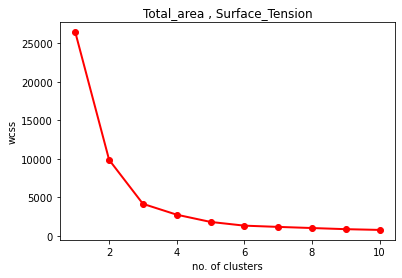

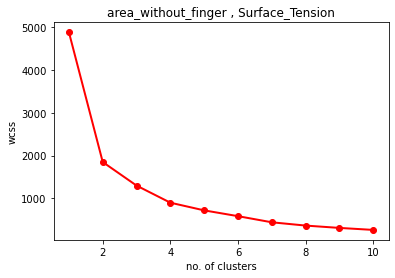

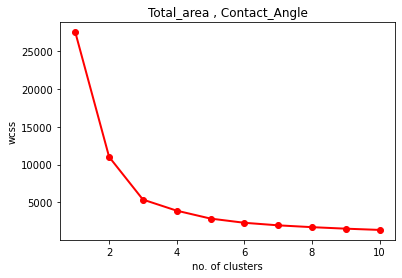

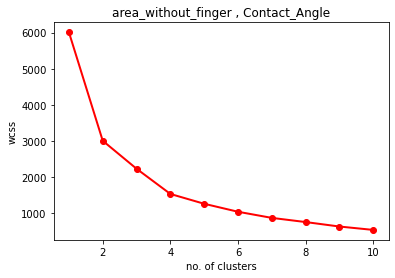

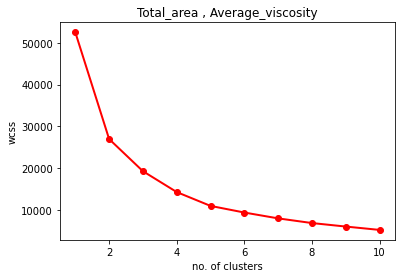

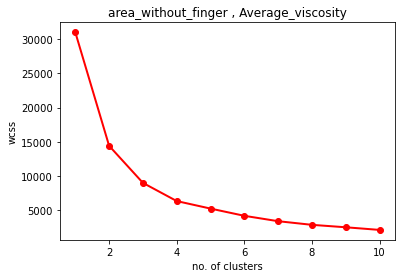

In [258]:
for feature1 in features_x:
    for feature2 in features_y:
        wcss = []

        data = df[[feature1, feature2]]
        
        for i in range(1,11):
            km = KMeans(n_clusters=i)
            km.fit(data)
            wcss.append(km.inertia_)

        x = np.arange(1,11)
        y = wcss
        plt.plot(x,y,'r-o',linewidth=2)
        plt.title(feature2+' , '+feature1)
        plt.xlabel("no. of clusters")
        plt.ylabel("wcss")
        plt.show()

In [259]:
n_clusters = 3
score = []

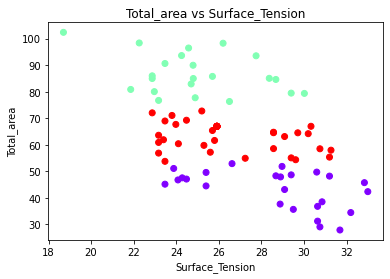

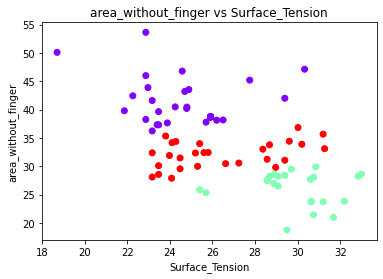

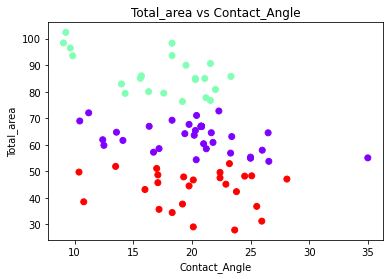

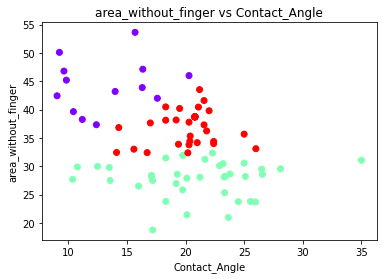

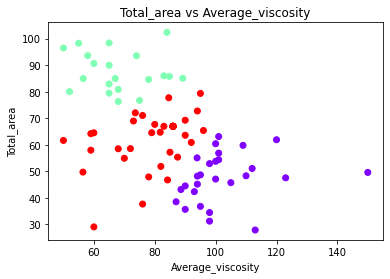

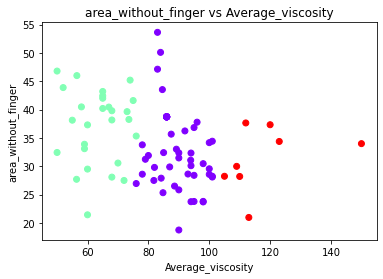

In [260]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]

        km = KMeans(n_clusters=n_clusters)
        km.fit(data)

        score.append(silhouette_score(data, km.labels_, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=km.labels_,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [261]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.5478602167657541
Surface_Tension vs area_without_finger -  0.4242219771443841
Contact_Angle vs Total_area -  0.5061863923621768
Contact_Angle vs area_without_finger -  0.3799093053484334
Average_viscosity vs Total_area -  0.3721328524016984
Average_viscosity vs area_without_finger -  0.46568724684821083


## Agglomerative Hierarchical Clustering

In [262]:
from sklearn.cluster import AgglomerativeClustering

In [263]:
n_clusters = 2
score = []

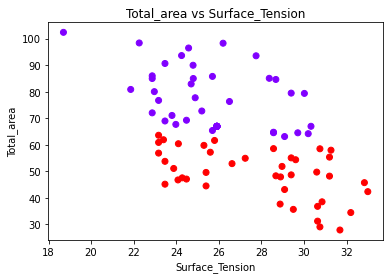

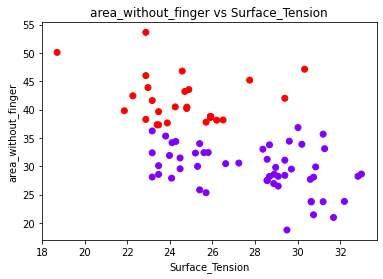

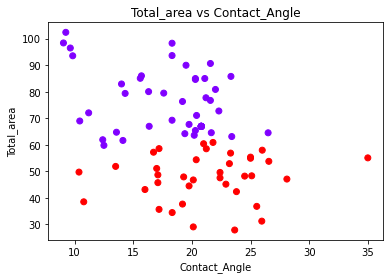

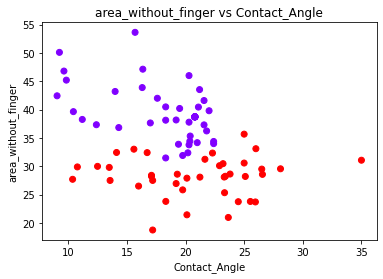

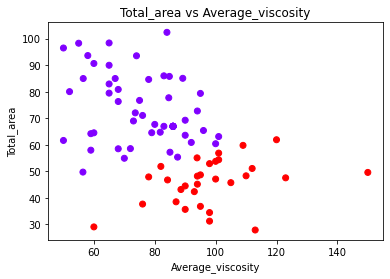

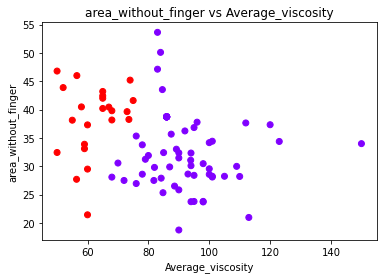

In [264]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        cluster_labels = agg_clustering.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()


In [265]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.5035329982857031
Surface_Tension vs area_without_finger -  0.5124845645614869
Contact_Angle vs Total_area -  0.4864219177429035
Contact_Angle vs area_without_finger -  0.3952144174282923
Average_viscosity vs Total_area -  0.39987931627023954
Average_viscosity vs area_without_finger -  0.4636790434039614


## DBSCAN

In [266]:
from sklearn.cluster import DBSCAN

In [267]:
eps = 2.0  
min_samples = 2  
score = []

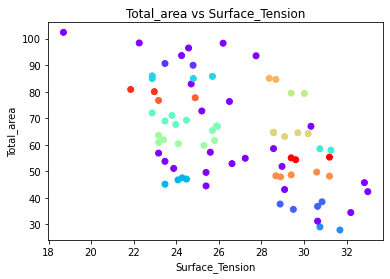

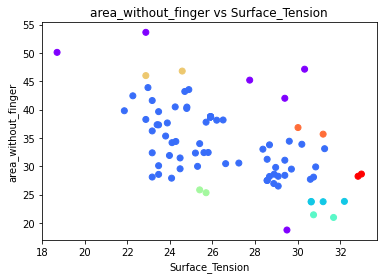

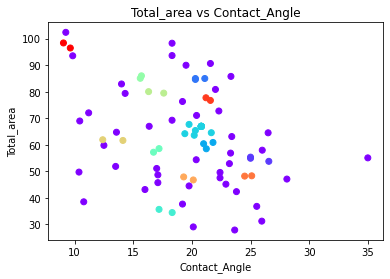

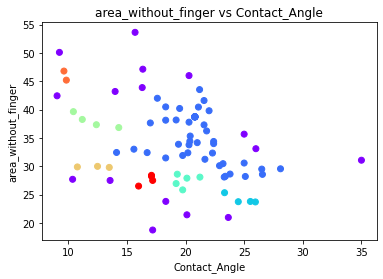

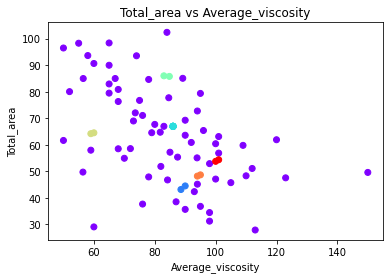

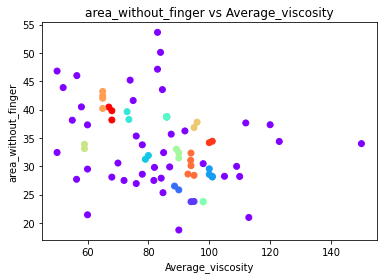

In [268]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        cluster_labels = dbscan.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [269]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.25003797147740786
Surface_Tension vs area_without_finger -  -0.1003536368930292
Contact_Angle vs Total_area -  -0.031237801466148664
Contact_Angle vs area_without_finger -  0.07518092669154613
Average_viscosity vs Total_area -  -0.26647967931295513
Average_viscosity vs area_without_finger -  0.061488901523964495


## Gaussian Mixture Model algorithm

In [270]:
from sklearn.mixture import GaussianMixture

In [271]:
n_clusters = 2  
score = []

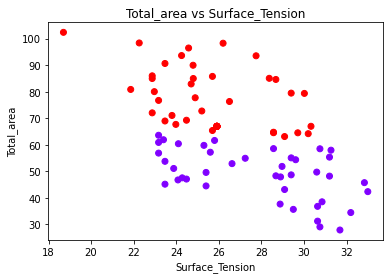

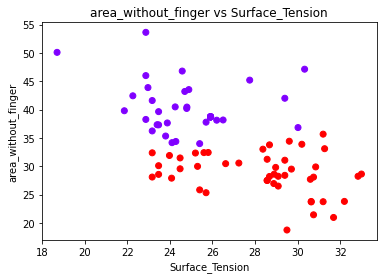

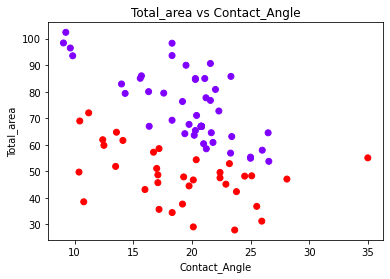

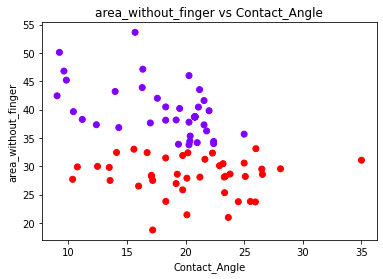

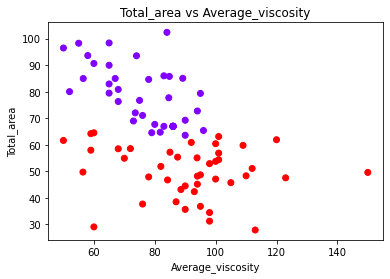

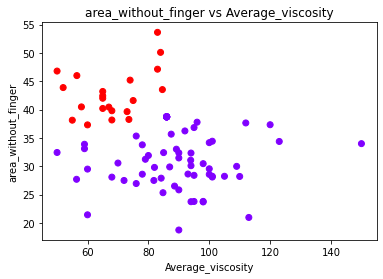

In [272]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
        cluster_labels = gmm.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [273]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.5035329982857031
Surface_Tension vs area_without_finger -  0.5245240198006232
Contact_Angle vs Total_area -  0.38479697029307874
Contact_Angle vs area_without_finger -  0.4231192858464515
Average_viscosity vs Total_area -  0.3483955520458548
Average_viscosity vs area_without_finger -  0.32010887120078907


## Affinity Propagation clustering algorithm

In [274]:
from sklearn.cluster import AffinityPropagation

In [275]:
damping = 0.5
score = []

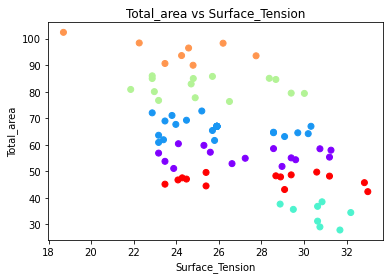

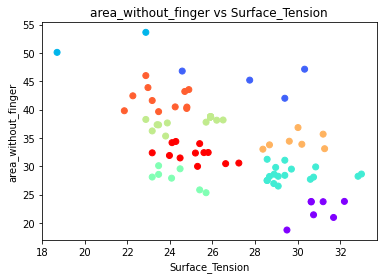

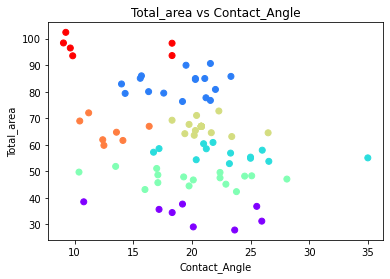

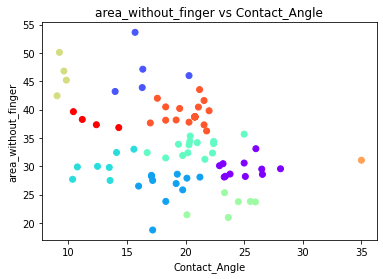

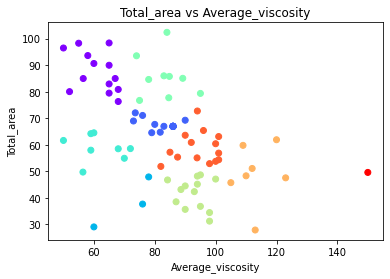

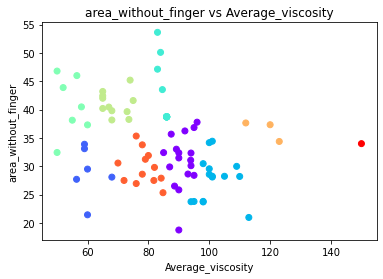

In [276]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        affinity_propagation = AffinityPropagation(damping=damping)
        cluster_labels = affinity_propagation.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [277]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.4919218557927866
Surface_Tension vs area_without_finger -  0.4612411644220865
Contact_Angle vs Total_area -  0.4536728411431033
Contact_Angle vs area_without_finger -  0.4371661566095802
Average_viscosity vs Total_area -  0.384917207080887
Average_viscosity vs area_without_finger -  0.39303410754707174


## Mean-Shift clustering algorithm

In [278]:
from sklearn.cluster import MeanShift

In [279]:
bandwidth = 1.0
score = []

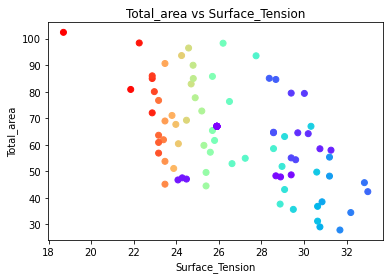

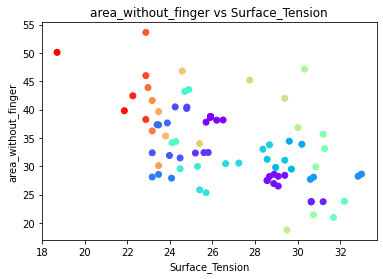

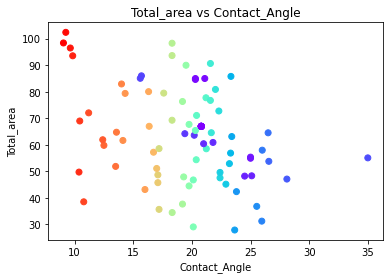

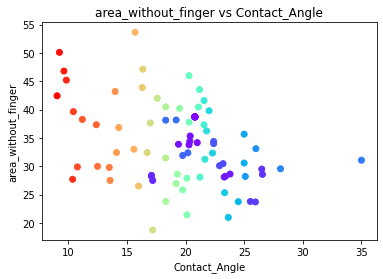

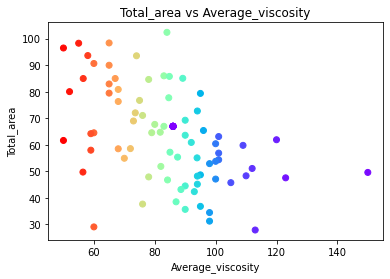

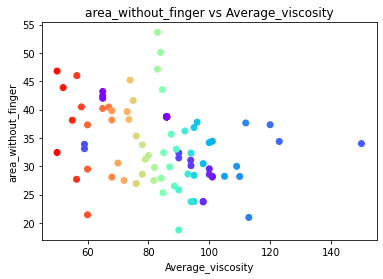

In [280]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        mean_shift = MeanShift(bandwidth=bandwidth)
        cluster_labels = mean_shift.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [281]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.2647412046110741
Surface_Tension vs area_without_finger -  0.45043952811720794
Contact_Angle vs Total_area -  0.2166643311003494
Contact_Angle vs area_without_finger -  0.2634420053254917
Average_viscosity vs Total_area -  0.11627906976744186
Average_viscosity vs area_without_finger -  0.2215479052688164


## OPTICS algorithm

In [282]:
from sklearn.cluster import OPTICS

In [283]:
min_samples = 2 
xi = 0.05  
score = []

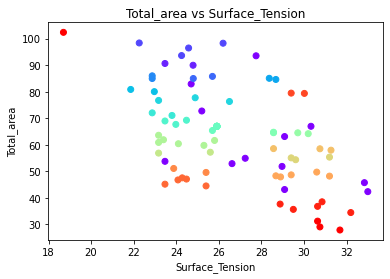

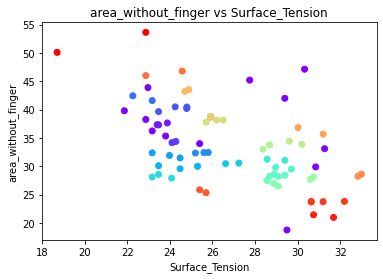

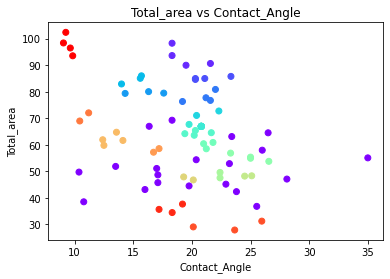

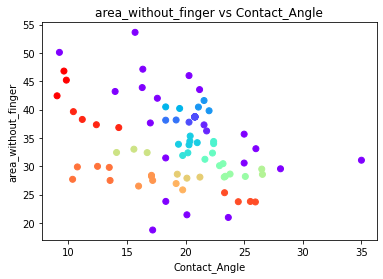

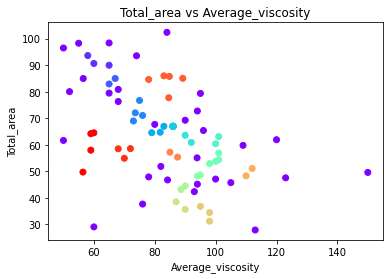

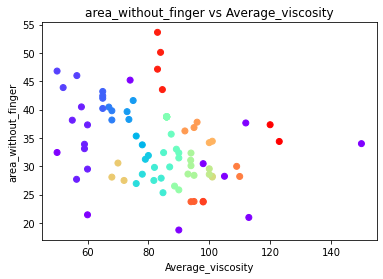

In [284]:
for feature1 in features_x:
    for feature2 in features_y:
        data = df[[feature1, feature2]]
        
        optics = OPTICS(min_samples=min_samples, xi=xi, metric='euclidean')
        cluster_labels = optics.fit_predict(data)

        score.append(silhouette_score(data, cluster_labels, metric='euclidean'))

        plt.scatter(df[feature1], df[feature2], c=cluster_labels,cmap='rainbow')
        plt.title(feature2+' vs '+feature1)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

In [285]:
index = 0
for feature1 in features_x:
    for feature2 in features_y:
        print(feature1,'vs',feature2,'- ',score[index])
        index=index+1

Surface_Tension vs Total_area -  0.35896633210984025
Surface_Tension vs area_without_finger -  0.4335700689066562
Contact_Angle vs Total_area -  0.29618351603282433
Contact_Angle vs area_without_finger -  0.2761795334775866
Average_viscosity vs Total_area -  0.11591598907828185
Average_viscosity vs area_without_finger -  0.4173645008500474
